# Pandas教程


### 2017七月在线 机器学习线上集训 julyedu.com
by 褚则伟 

## 目录
- Group by
- Aggregate
- concat
- merge
- join
- bike project
- stocks project
- credit project

## Group By

### 2017七月在线 机器学习线上集训 julyedu.com

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [2]:
import pandas as pd
import numpy as np

In [3]:
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
print(salaries)

   Bonus   Name  Salary  Year
0   3000   July   10000  2016
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
3   1200    Han    5000  2016
4   4000   July   18000  2017
5   2300   July   25000  2017
6    500  Zewei    3000  2017
7   1000   July    4000  2017


接下来我给大家演示一下什么叫做Group By

In [4]:
group_by_name = salaries.groupby('Name')
group_by_name

groupby构造了一个GroupBy object，我们可以对这个object做各种操作

### groupby之后一般要做一些aggregate操作

In [5]:
group_by_name.sum()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


In [6]:
group_by_name[["Salary", "Bonus"]].sum()

,Salary,Bonus
Name,,
Han,5000,1200
July,57000,10300
Zewei,9000,2500


默认会排序，也可以选择不排序

In [7]:
salaries.groupby('Name', sort=False).sum()

,Bonus,Salary,Year
Name,,,
July,10300,57000,8067
Zewei,2500,9000,6049
Han,1200,5000,2016


也可以这么写

In [8]:
group_by_name.aggregate(sum)

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


group by的attributes

In [9]:
print(group_by_name.groups)
print(len(group_by_name))

{'Han': Int64Index([3], dtype='int64'), 'July': Int64Index([0, 4, 5, 7], dtype='int64'), 'Zewei': Int64Index([1, 2, 6], dtype='int64')}
3


用多个列groupby

In [11]:
group_by_name_year = salaries.groupby(['Name', 'Year'])
group_by_name_year.sum()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   7300   47000
Zewei 2016   2000    6000
      2017    500    3000

除了sum之外，我们再来尝试一下size,mean,median 

In [12]:
group_by_name_year.size()

Name   Year
Han    2016    1
July   2016    1
       2017    3
Zewei  2016    2
       2017    1
dtype: int64

In [13]:
group_by_name.mean()

,Bonus,Salary,Year
Name,,,
Han,1200.000000,5000.0,2016.000000
July,2575.000000,14250.0,2016.750000
Zewei,833.333333,3000.0,2016.333333


In [14]:
group_by_name.median()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,2650,14000,2017
Zewei,1000,3000,2016


In [15]:
group_by_name.describe()

Bonus                                                                    \
      count         mean          std     min     25%     50%     75%     max   
Name                                                                            
Han     1.0  1200.000000          NaN  1200.0  1200.0  1200.0  1200.0  1200.0   
July    4.0  2575.000000  1260.621540  1000.0  1975.0  2650.0  3250.0  4000.0   
Zewei   3.0   833.333333   288.675135   500.0   750.0  1000.0  1000.0  1000.0   

      Salary            ...                      Year                        \
       count     mean   ...        75%      max count         mean      std   
Name                    ...                                                   
Han      1.0   5000.0   ...     5000.0   5000.0   1.0  2016.000000      NaN   
July     4.0  14250.0   ...    19750.0  25000.0   4.0  2016.750000  0.50000   
Zewei    3.0   3000.0   ...     3500.0   4000.0   3.0  2016.333333  0.57735   

                                                
          min      25%     50%     75%     max  
Name                                            
Han    2016.0  2016.00  2016.0  2016.0  2016.0  
July   2016.0  2016.75  2017.0  2017.0  2017.0  
Zewei  2016.0  2016.00  2016.0  2016.5  2017.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [16]:
for name, group in group_by_name:
    print(name)
    print(group)

Han
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
July
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
Zewei
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017


选择一个group

In [17]:
print(group_by_name.get_group("Zewei"))
type(group_by_name.get_group("Zewei"))


   Bonus  Salary  Year
1   1000    2000  2016
2   1000    4000  2016
6    500    3000  2017


pandas.core.frame.DataFrame

In [19]:
group_by_name[["Bonus", "Salary"]].agg([np.sum, np.mean, np.std])

Bonus                           Salary                    
         sum         mean          std    sum   mean          std
Name                                                             
Han     1200  1200.000000          NaN   5000   5000          NaN
July   10300  2575.000000  1260.621540  57000  14250  9178.779875
Zewei   2500   833.333333   288.675135   9000   3000  1000.000000

### transform

In [20]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0, parse_dates=["Date"])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [21]:
key = lambda x: x.year

In [22]:
nvda.groupby(key).agg([np.mean, np.std]).head()

Open                 High                  Low            \
           mean       std       mean       std       mean       std   
1999   1.950782  0.588882   2.007317  0.614302   1.883559  0.571658   
2000   8.781084  2.999908   9.222697  3.114186   8.360522  2.904761   
2001  13.091254  3.839777  13.600750  3.829838  12.680548  3.830944   
2002   9.690344  6.561287   9.955093  6.664226   9.344391  6.375212   
2003   5.902434  1.461862   6.042659  1.491260   5.764960  1.423422   

          Close            Adj Close                  Volume                
           mean       std       mean       std          mean           std  
1999   1.947230  0.601041   1.808134  0.558107  6.433220e+06  8.142949e+06  
2000   8.778826  3.013104   8.151729  2.797869  1.104182e+07  7.985374e+06  
2001  13.181552  3.833637  12.239956  3.559789  2.782387e+07  1.384318e+07  
2002   9.614749  6.519053   8.927940  6.053379  3.168655e+07  1.558742e+07  
2003   5.900344  1.459852   5.478865  1.355570  2.430220e+07  1.899657e+07

In [24]:
zscore = lambda x: (x-x.mean())/x.std()

In [28]:
transformed = nvda.groupby(key).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [29]:
%matplotlib inline

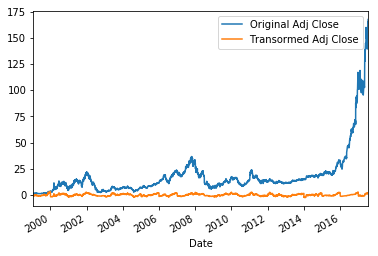

In [30]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"], 
                        "Transormed Adj Close": transformed["Adj Close"]})
compare.plot()

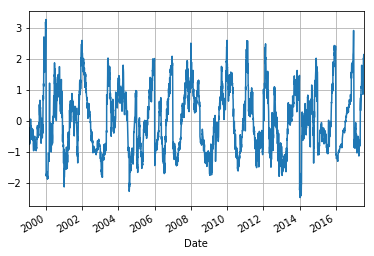

In [31]:
transformed["Close"].plot(grid=True)

In [33]:
price_range = lambda x: x.max() - x.min()
nvda.groupby(key).transform(price_range).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0


In [35]:
(nvda.groupby(key).transform("max") - nvda.groupby(key).transform("min")).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200


### concat, merge, join
### 2017七月在线 机器学习线上集训 julyedu.com
by 褚则伟 

In [37]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [38]:
df2 = pd.DataFrame({'apts': [25000, 20000],
                   'cars': [150000, 120000],},
                  index = ['Hangzhou', 'Najing'])
print(df2)

           apts    cars
Hangzhou  25000  150000
Najing    20000  120000


In [39]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars
Guangzhou  30000  180000
Chongqing  10000  100000


### concatenate

In [40]:
result = pd.concat([df1, df2, df3])
print(result)

            apts    cars
Shanghai   55000  200000
Beijing    60000  300000
Hangzhou   25000  150000
Najing     20000  120000
Guangzhou  30000  180000
Chongqing  10000  100000


在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [41]:
result2 = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
print(result2)

              apts    cars
x Shanghai   55000  200000
  Beijing    60000  300000
y Hangzhou   25000  150000
  Najing     20000  120000
z Guangzhou  30000  180000
  Chongqing  10000  100000


In [42]:
result2.loc["y"]

,apts,cars
Hangzhou,25000,150000
Najing,20000,120000


如果要换个方向concat，只要声明axis就可以了

In [43]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [44]:
result3 = pd.concat([result, df4], axis=1)
print(result3)

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Chongqing  10000.0  100000.0       NaN
Guangzhou  30000.0  180000.0   20000.0
Hangzhou   25000.0  150000.0       NaN
Najing     20000.0  120000.0       NaN
Shanghai   55000.0  200000.0   30000.0
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [46]:
result4 = pd.concat([result, df4], axis=1, join='inner')
print(result4)

            apts    cars  salaries
Shanghai   55000  200000     30000
Beijing    60000  300000     30000
Guangzhou  30000  180000     20000


如果我们只想保留左边部分的index呢

In [47]:
result5 = pd.concat([result, df4], axis=1, join_axes=[result.index])
print(result5)

            apts    cars  salaries
Shanghai   55000  200000   30000.0
Beijing    60000  300000   30000.0
Hangzhou   25000  150000       NaN
Najing     20000  120000       NaN
Guangzhou  30000  180000   20000.0
Chongqing  10000  100000       NaN


右边部分

In [48]:
result6 = pd.concat([result, df4], axis=1, join_axes=[df4.index])
print(result6)

              apts      cars  salaries
Suzhou         NaN       NaN     10000
Beijing    60000.0  300000.0     30000
Shanghai   55000.0  200000.0     30000
Guangzhou  30000.0  180000.0     20000
Tianjin        NaN       NaN     15000


#### 用[```append```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html)来做concatenation 

In [49]:
print(df1.append(df2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Hangzhou  25000  150000
Najing    20000  120000


In [50]:
print(df1.append(df4))

              apts      cars  salaries
Shanghai   55000.0  200000.0       NaN
Beijing    60000.0  300000.0       NaN
Suzhou         NaN       NaN   10000.0
Beijing        NaN       NaN   30000.0
Shanghai       NaN       NaN   30000.0
Guangzhou      NaN       NaN   20000.0
Tianjin        NaN       NaN   15000.0


In [52]:
df1.append([df2,df3])

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [53]:
s1 = pd.Series([60, 50], index=['Shanghai', 'Beijing'], name='meal')
print(s1)

Shanghai    60
Beijing     50
Name: meal, dtype: int64


In [54]:
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [55]:
print(pd.concat([df1, s1], axis=1))

           apts    cars  meal
Shanghai  55000  200000    60
Beijing   60000  300000    50


下面讲如何append一个row到DataFrame里。

In [56]:
s2 = pd.Series([18000, 12000], index=['apts', 'cars'], name='Xiamen') #注意这里的name是必须要有的，因为要用作Index。
print(s2)

apts    18000
cars    12000
Name: Xiamen, dtype: int64


In [57]:
print(df1.append(s2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Xiamen    18000   12000


### Merge(Join)
### 2017七月在线 机器学习线上集训 julyedu.com

In [58]:
result = result.reset_index().rename(columns={"index":"cities"})
result

,cities,apts,cars
0,Shanghai,55000,200000
1,Beijing,60000,300000
2,Hangzhou,25000,150000
3,Najing,20000,120000
4,Guangzhou,30000,180000
5,Chongqing,10000,100000


In [60]:
df4 = df4.reset_index().rename(columns={"index": "cities"})

In [61]:
df = pd.merge(result, df4, on="cities")
print(df)

      cities   apts    cars  salaries
0   Shanghai  55000  200000     30000
1    Beijing  60000  300000     30000
2  Guangzhou  30000  180000     20000


In [62]:
df = pd.merge(result, df4, on='cities', how='outer')
print(df)

      cities     apts      cars  salaries
0   Shanghai  55000.0  200000.0   30000.0
1    Beijing  60000.0  300000.0   30000.0
2   Hangzhou  25000.0  150000.0       NaN
3     Najing  20000.0  120000.0       NaN
4  Guangzhou  30000.0  180000.0   20000.0
5  Chongqing  10000.0  100000.0       NaN
6     Suzhou      NaN       NaN   10000.0
7    Tianjin      NaN       NaN   15000.0


In [63]:
df = pd.merge(result, df4, on='cities', how='right')
print(df)

      cities     apts      cars  salaries
0   Shanghai  55000.0  200000.0     30000
1    Beijing  60000.0  300000.0     30000
2  Guangzhou  30000.0  180000.0     20000
3     Suzhou      NaN       NaN     10000
4    Tianjin      NaN       NaN     15000


In [64]:
df = pd.merge(result, df4, on='cities', how='left')
print(df)

      cities   apts    cars  salaries
0   Shanghai  55000  200000   30000.0
1    Beijing  60000  300000   30000.0
2   Hangzhou  25000  150000       NaN
3     Najing  20000  120000       NaN
4  Guangzhou  30000  180000   20000.0
5  Chongqing  10000  100000       NaN


#### join on index

In [66]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [67]:
df4 = df4.set_index("cities")

In [68]:
df4

,salaries
cities,
Suzhou,10000
Beijing,30000
Shanghai,30000
Guangzhou,20000
Tianjin,15000


In [69]:
print(df1.join(df4))

           apts    cars  salaries
Shanghai  55000  200000     30000
Beijing   60000  300000     30000


In [70]:
print(df1.join(df4, how='outer'))

              apts      cars  salaries
Beijing    60000.0  300000.0     30000
Guangzhou      NaN       NaN     20000
Shanghai   55000.0  200000.0     30000
Suzhou         NaN       NaN     10000
Tianjin        NaN       NaN     15000


也可以用merge来写

In [71]:
print(pd.merge(df1, df4, left_index=True, right_index=True, how='outer'))

              apts      cars  salaries
Beijing    60000.0  300000.0     30000
Guangzhou      NaN       NaN     20000
Shanghai   55000.0  200000.0     30000
Suzhou         NaN       NaN     10000
Tianjin        NaN       NaN     15000


### bikes project

In [1]:
import pandas as pd

我们先从CSV文件中读取一些数据。

bike.csv记录了Montreal自行车路线的数据，具体有7条路线，数据记录了每条自行车路线每天分别有多少人。

In [73]:
bikes = pd.read_csv('data/bikes.csv', encoding='latin1')
bikes.head()

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


In [87]:
bikes = pd.read_csv('data/bikes.csv', sep=';', parse_dates=['Date'], encoding='latin1', dayfirst=True, index_col='Date')
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


[```dropna```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)会删除所有带NA的行

In [76]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


删太多了，我们只想删掉全部都是NA的行

In [77]:
bikes.dropna(how='all').head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [78]:
bikes.dropna(axis=1, how='all').head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [79]:
bikes.shape

(310, 9)

我们数一数每一列有多少数据缺失

In [80]:
bikes.apply(lambda x: sum(x.isnull()))

Berri 1                                  0
Brébeuf (données non disponibles)      310
Côte-Sainte-Catherine                    0
Maisonneuve 1                            0
Maisonneuve 2                            0
du Parc                                  0
Pierre-Dupuy                             0
Rachel1                                  0
St-Urbain (données non disponibles)    310
dtype: int64

下面给大家介绍如何填充缺失的数据

In [81]:
row = bikes.iloc[0].copy()
row.fillna(row.mean())

Berri 1                                35.000000
Brébeuf (données non disponibles)      25.142857
Côte-Sainte-Catherine                   0.000000
Maisonneuve 1                          38.000000
Maisonneuve 2                          51.000000
du Parc                                26.000000
Pierre-Dupuy                           10.000000
Rachel1                                16.000000
St-Urbain (données non disponibles)    25.142857
Name: 2012-01-01 00:00:00, dtype: float64

In [90]:
bikes.iloc[2,1] = 2

In [91]:
m = bikes.mean(axis=1)
#一行一行去填充
for i, col in enumerate(bikes):
    bikes.iloc[:, i] = bikes.iloc[:, i].fillna(m)
    
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,2.000000,2,104,248,89,3,58,80.125000
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


In [92]:
bikes[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,2.000000,2,104,248,89,3,58,80.125000
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


In [94]:
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [95]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [96]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [97]:
berri_bikes.loc[:, 'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


有了weekday信息之后，我们就可以用上我们前面学过的.groupyby把骑车人数按照weekday分类，然后用aggregate算出每个工作日的骑车人数之和。

In [98]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [99]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


接下来我们试试能不能把每条路线都加起来，然后算出一天骑自行车出门的人数之和。
to_frame可以把一个Series转换成一个DataFrame

In [102]:
bikes_sum = bikes.sum(axis=1).to_frame()
bikes_sum.head()
# bikes_sum.index

,0
Date,
2012-01-01,226.285714
2012-01-02,523.285714
2012-01-03,721.125000
2012-01-04,975.857143
2012-01-05,1103.142857


In [103]:
bikes_sum.loc[:, 'weekday'] = bikes_sum.index.weekday
bikes_sum.head()
#type(berri_bikes)

,0,weekday
Date,,
2012-01-01,226.285714,6
2012-01-02,523.285714,0
2012-01-03,721.125000,1
2012-01-04,975.857143,2
2012-01-05,1103.142857,3


In [104]:
weekday_counts = bikes_sum.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,0
Monday,9.192381e+05
Tuesday,8.980764e+05
Wednesday,1.015357e+06
Thursday,1.065946e+06
Friday,9.498497e+05
Saturday,6.643299e+05
Sunday,6.660604e+05


作个简单的图看一看
[plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

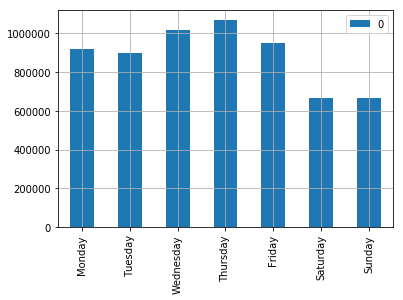

In [105]:
%matplotlib inline
weekday_counts.plot(grid=True, kind="bar")

### 2017七月在线 机器学习线上集训 julyedu.com

### stock project

[stock analysis](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

In [106]:
goog = pd.read_csv("data/GOOG.csv", index_col=0)
goog.index = pd.to_datetime(goog.index)
# goog

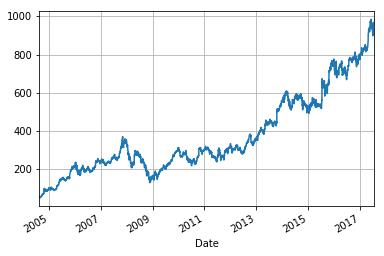

In [107]:
goog["Adj Close"].plot(grid = True)

```shift```这个function可以帮我们移动时间

In [108]:
goog.shift(1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,49.813286,51.835709,47.800831,49.982655,49.982655,44871300.0
2004-08-23,50.316402,54.336334,50.062355,53.952770,53.952770,22942800.0
2004-08-24,55.168217,56.528118,54.321388,54.495735,54.495735,18342800.0
2004-08-25,55.412300,55.591629,51.591621,52.239193,52.239193,15319700.0


In [109]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


datetime indexing

In [111]:
goog["log-return"] = np.log(goog["Adj Close"] / goog["Adj Close"].shift(1))
print(goog["log-return"].head())

Date
2004-08-19         NaN
2004-08-20    0.076433
2004-08-23    0.010013
2004-08-24   -0.042289
2004-08-25    0.010718
Name: log-return, dtype: float64


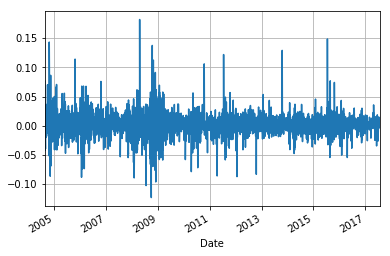

In [112]:
goog["log-return"].plot(grid=True)

In [114]:
aapl = pd.read_csv("data/AAPL.csv", index_col=0)
aapl.index = pd.to_datetime(aapl.index)
aapl["Adj Close"].plot(grid=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [115]:
aapl["Adj Close"] = pd.to_numeric(aapl["Adj Close"])

ValueError: Unable to parse string "null" at position 165

In [116]:
aapl["Adj Close"][aapl["Adj Close"] == "null"] = np.NaN

In [119]:
aapl["Adj Close"] = aapl["Adj Close"].ffill()

In [118]:
aapl["Adj Close"].head()

Date
1980-12-12    0.423252
1980-12-15    0.401170
1980-12-16    0.371726
1980-12-17    0.380927
1980-12-18    0.391969
Name: Adj Close, dtype: object

In [120]:
aapl["Adj Close"] = aapl["Adj Close"].apply(lambda x: float(x))

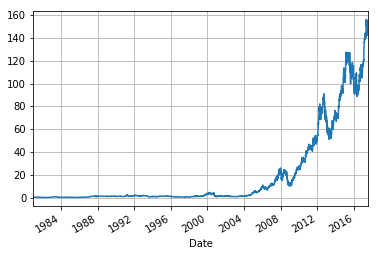

In [121]:
aapl["Adj Close"].plot(grid=True)

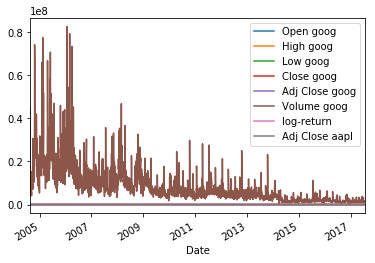

In [122]:
goog.join(aapl, lsuffix=" goog", rsuffix=" aapl").plot()

In [124]:
msft = pd.read_csv("data/MSFT.csv", index_col=0)
msft.index = pd.to_datetime(msft.index)

In [125]:
stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
                      "MSFT": msft["Adj Close"].bfill(),
                      "GOOG": goog["Adj Close"].bfill()})

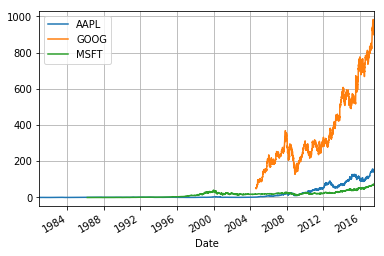

In [126]:
# stocks = pd.to_numeric(stocks)
stocks.plot(grid=True)

In [127]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

In [133]:
valid_stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2004-08-19,1.981210,49.982655,18.360205
2004-08-20,1.987016,53.952770,18.414366
2004-08-23,2.005080,54.495735,18.495850
2004-08-24,2.061206,52.239193,18.495850
2004-08-25,2.132171,52.802086,18.706341


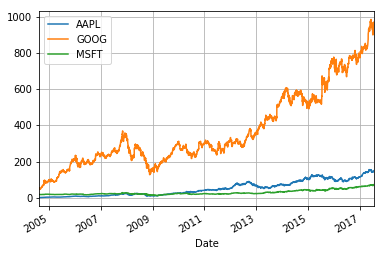

In [128]:
valid_stocks.plot(grid=True)

AAPL    float64
GOOG    float64
MSFT    float64
dtype: object

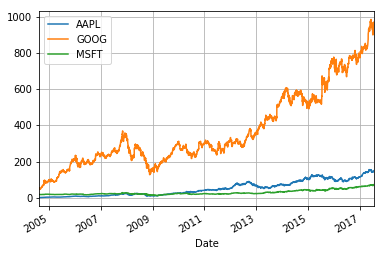

In [129]:
valid_stocks.plot(grid=True)
valid_stocks.dtypes

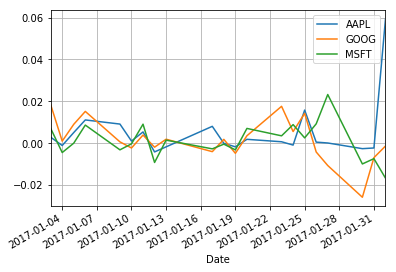

In [130]:
valid_stocks_lr = np.log(valid_stocks / valid_stocks.shift(1))
valid_stocks_lr.loc["2017-01-01":"2017-02-01"].plot(grid=True)

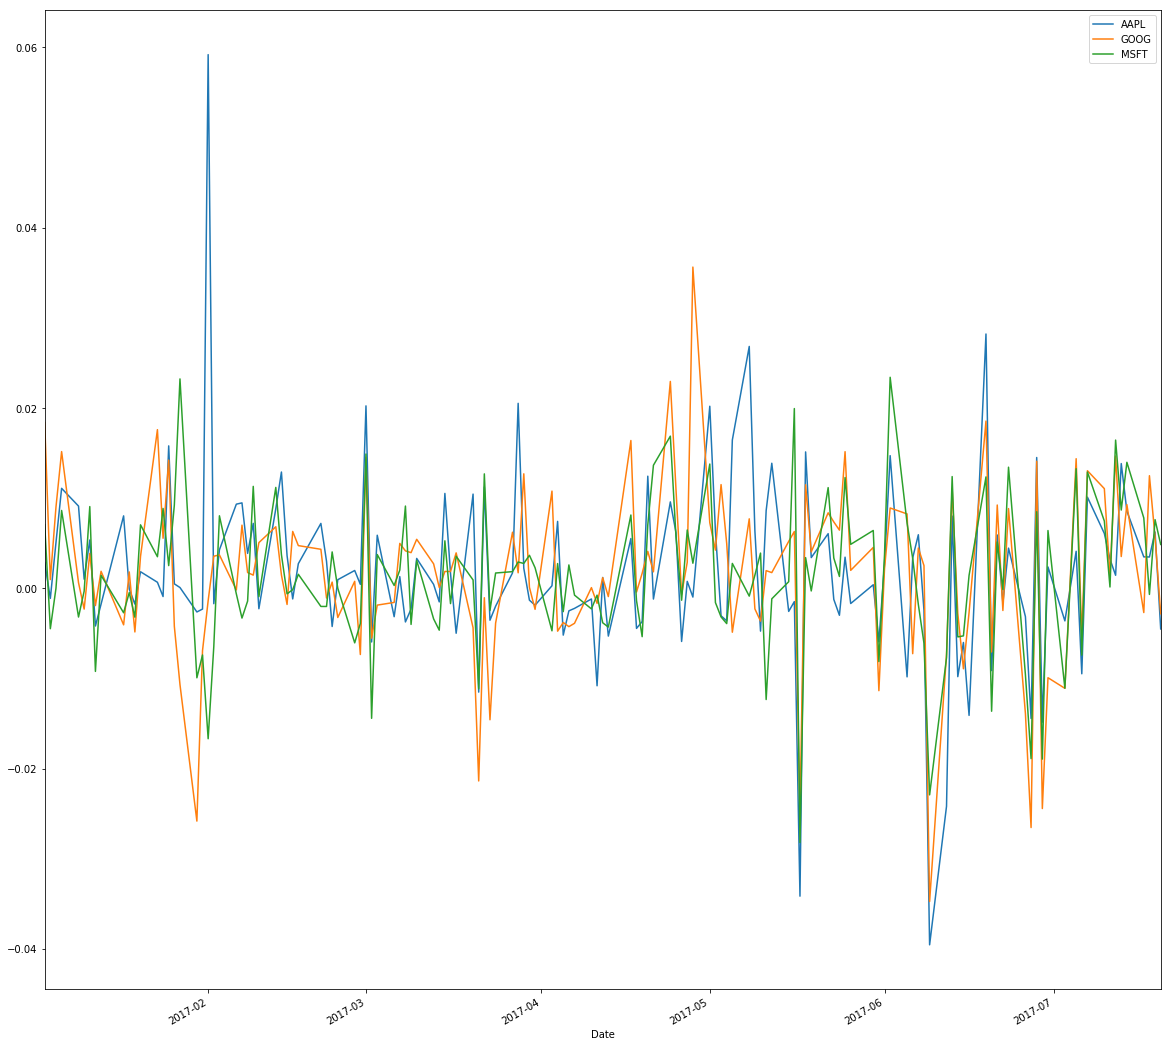

In [131]:
valid_stocks_lr[valid_stocks_lr.index > pd.to_datetime("2017-01-01")].plot(figsize=(20, 20))

### 下面我们试试能不能把日K图变成月K图

In [134]:
monthly_stocks = valid_stocks.groupby([valid_stocks.index.year, valid_stocks.index.month]).last()
monthly_stocks

AAPL        GOOG       MSFT
Date Date                                   
2004 8       2.225070   50.993862  18.536587
     9       2.499898   64.558022  18.774242
     10      3.380507   94.964050  18.991516
     11      4.325631   90.650223  20.288960
     12      4.154669   96.035034  20.220860
2005 1       4.961088   97.444756  19.887878
     2       5.788151   93.643997  19.099041
     3       5.376554   89.917969  18.347527
     4       4.652713  109.589233  19.205309
     5       5.130114  138.117310  19.646990
     6       4.749484  146.525787  18.915941
     7       5.503002  143.342712  19.502306
     8       6.050076  142.466003  20.912022
     9       6.917136  157.639130  19.651812
     10      7.430664  185.375168  19.628889
     11      8.750609  201.698990  21.203133
     12      9.275754  206.655411  20.031137
2006 1       9.742828  215.522171  21.563158
     2       8.837059  180.632950  20.652407
     3       8.092573  194.271820  20.913734
     4       9.082209  208.189651  18.561808
     5       7.711944  185.215759  17.476786
     6       7.389377  208.882065  17.978323
     7       8.768673  192.578171  18.564741
     8       8.754478  188.558243  19.903198
     9       9.932499  200.199600  21.181025
     10     10.461510  237.305527  22.234270
     11     11.826615  241.499802  22.815401
     12     10.946650  229.380234  23.203939
2007 1      11.061483  249.813644  23.981028
...               ...         ...        ...
2015 2     123.003296  556.871094  41.354286
     3     119.144463  546.499573  38.345856
     4     119.833878  537.340027  45.871666
     5     125.267044  532.109985  44.480183
     6     120.603661  520.510010  41.907818
     7     116.632576  625.609985  44.328312
     8     108.911949  618.250000  41.582230
     9     106.535904  608.419983  42.289272
     10    115.421944  710.809998  50.296143
     11    114.751991  742.599976  52.280025
     12    102.103088  758.880005  53.366989
2016 1      94.420609  742.950012  52.991844
     2      94.299042  697.770020  49.293587
     3     106.294884  744.950012  53.507950
     4      91.421997  693.010010  48.315075
     5      97.983612  735.719971  51.706627
     6      93.803650  692.099976  49.921288
     7     102.251869  768.789978  55.296825
     8     104.670319  767.049988  56.407177
     9     111.526680  777.289978  56.544609
     10    112.010071  784.539978  58.822102
     11    109.590553  758.039978  59.555504
     12    114.845985  771.820007  61.413525
2017 1     120.329475  796.789978  63.894184
     2     136.426895  823.210022  63.615360
     3     143.069473  829.559998  65.484650
     4     143.059494  905.960022  68.069824
     5     152.759995  964.859985  69.839996
     6     144.020004  908.729980  68.930000
     7     150.339996  968.150024  74.220001

[156 rows x 3 columns]

In [135]:
index = [ str(i[0]) + "-" + str(i[1]) for i in monthly_stocks.index.values]
print(index)
index = pd.core.indexes.period.PeriodIndex(index, freq="M")

['2004-8', '2004-9', '2004-10', '2004-11', '2004-12', '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6', '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12', '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6', '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12', '2007-1', '2007-2', '2007-3', '2007-4', '2007-5', '2007-6', '2007-7', '2007-8', '2007-9', '2007-10', '2007-11', '2007-12', '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12', '2009-1', '2009-2', '2009-3', '2009-4', '2009-5', '2009-6', '2009-7', '2009-8', '2009-9', '2009-10', '2009-11', '2009-12', '2010-1', '2010-2', '2010-3', '2010-4', '2010-5', '2010-6', '2010-7', '2010-8', '2010-9', '2010-10', '2010-11', '2010-12', '2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9', '2011-10', '2011-11', '2011-12', '2012-1', '2012-2', '2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8', '2012

In [136]:
monthly_stocks.index = index #= monthly_stocks.index.

In [139]:
monthly_stocks.head()

,AAPL,GOOG,MSFT
2004-08,2.225070,50.993862,18.536587
2004-09,2.499898,64.558022,18.774242
2004-10,3.380507,94.964050,18.991516
2004-11,4.325631,90.650223,20.288960
2004-12,4.154669,96.035034,20.220860


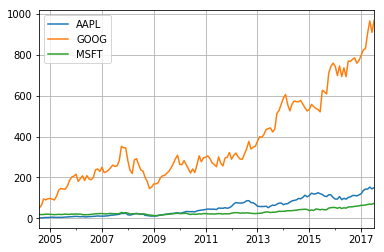

In [140]:
monthly_stocks.plot(grid=True)

In [141]:
monthly_stocks.loc["2011-8"]

AAPL     49.653461
GOOG    269.469971
MSFT     22.714565
Name: 2011-08, dtype: float64

In [142]:
monthly_stocks.loc["2011/8"]

AAPL     49.653461
GOOG    269.469971
MSFT     22.714565
Name: 2011-08, dtype: float64

In [85]:
monthly_stocks.loc["8/2011"]

AAPL     49.653461
GOOG    269.469971
MSFT     22.714565
Name: 2011-08, dtype: float64

## 特征处理


更多资料参考寒小阳的教程[link](https://github.com/HanXiaoyang/Feature_Engineering_and_XGBoost_Parameter_Tuning/blob/master/Feature%20Engineering.ipynb)

In [144]:
df = pd.read_csv("data/credit-data.csv")
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [146]:
for i, val in enumerate(df):
    print(val)
    print(df[val].value_counts())

serious_dlqin2yrs
0    104905
1      7510
Name: serious_dlqin2yrs, dtype: int64
revolving_utilization_of_unsecured_lines
0.000000    8154
1.000000    7651
1.000000      13
0.950100       6
0.982004       4
0.717131       4
0.004999       4
0.120879       4
0.988024       4
0.921079       4
0.990033       4
0.003650       4
0.857143       4
0.076923       4
0.017849       4
0.002500       4
0.017749       4
0.912176       4
0.161677       4
0.000800       4
0.035964       4
0.538922       4
0.058941       4
0.007984       4
0.713147       4
0.018798       4
0.999001       4
0.992016       4
1.105788       4
0.147705       3
            ... 
0.129278       1
0.929222       1
0.043920       1
0.691795       1
0.067803       1
0.079228       1
0.081027       1
0.606954       1
0.016722       1
0.121215       1
0.006934       1
0.091811       1
0.329528       1
0.070119       1
0.440980       1
0.011720       1
0.410886       1
0.024189       1
0.995846       1
0.200634       1
0.046474    

In [147]:
df['income_bins'] = pd.cut(df.monthly_income, bins=15, labels=False)
pd.value_counts(df.income_bins)

0     112392
1         11
3          5
2          4
14         1
7          1
4          1
Name: income_bins, dtype: int64

In [148]:
df["monthly_income"] = df["monthly_income"].fillna(df["monthly_income"].mean())

In [150]:
df["income_bins"] = np.log(df.monthly_income + 1e-9)

In [151]:
df["income_bins"] = df["income_bins"].astype("int")

In [152]:
df[["income_bins", "serious_dlqin2yrs"]].groupby("income_bins").mean()

,serious_dlqin2yrs
income_bins,
-20,0.042380
0,0.027149
1,0.200000
2,0.000000
3,0.000000
4,0.029412
5,0.042254
6,0.055284
7,0.095066


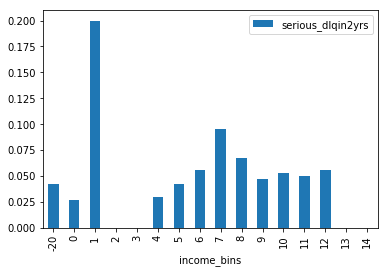

In [155]:
cols = ['income_bins', 'serious_dlqin2yrs']
income_means = df[cols].groupby("income_bins").mean()
income_means.plot(kind="bar")

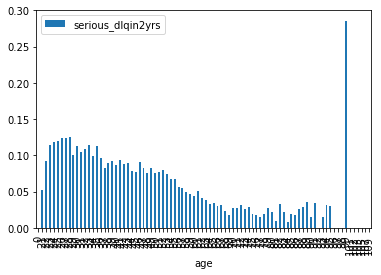

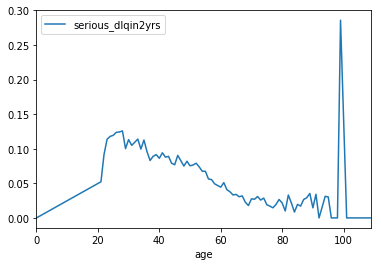

In [158]:
cols = ['age', 'serious_dlqin2yrs']
age_means = df[cols].groupby("age").mean()
age_means.plot(kind="bar")
age_means.plot()

### [cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

In [159]:
mybins = [0] + list(range(20, 80, 5)) + [120]
df['age_bucket'] = pd.cut(df.age, bins=mybins)
df['age_bucket'].value_counts()

(45, 50]     14112
(50, 55]     13390
(55, 60]     12629
(60, 65]     12317
(40, 45]     12053
(35, 40]     10241
(65, 70]      8315
(30, 35]      8123
(75, 120]     7581
(25, 30]      5803
(70, 75]      5600
(20, 25]      2250
(0, 20]          0
Name: age_bucket, dtype: int64

In [160]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().fillna(0)

,serious_dlqin2yrs
age_bucket,
"(0, 20]",0.000000
"(20, 25]",0.109778
"(25, 30]",0.116319
"(30, 35]",0.108211
"(35, 40]",0.088956
"(40, 45]",0.085124
"(45, 50]",0.080995
"(50, 55]",0.072890
"(55, 60]",0.050598


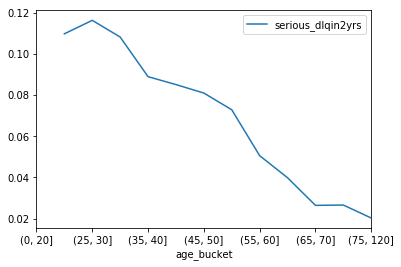

In [161]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().plot()

把categorize的类型转换成数值类型

In [163]:
labels, levels = pd.factorize(df.age_bucket)
df.age_bucket = labels
df.age_bucket.head()

0    0
1    1
2    1
3    2
4    3
Name: age_bucket, dtype: int64